<a href="https://colab.research.google.com/github/anisha-d08/covid-19-forecast/blob/main/Major_Proj_Forecasting_Model_New_Deaths_Covid_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/owid-covid-data (1).csv")

In [ ]:
df_ind=df[df.location=="India"]

In [ ]:
df_ind
df_new=pd.DataFrame(data=[list(df_ind.date),list(df_ind.new_deaths)])
df_new=df_new.transpose()

In [ ]:
l=[df_new[0][j] for j in range(41)]

In [ ]:
df_new=df_new.dropna()

In [ ]:
df_new.isnull().sum()

0    0
1    0
dtype: int64

In [ ]:
df_new=df_new.rename(columns={0:'ds',1:'y'})

In [ ]:
df_new['ds']=pd.to_datetime(df_new['ds'])
df_new['y']=df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 41 to 418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      378 non-null    datetime64[ns]
 1   y       378 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.9 KB


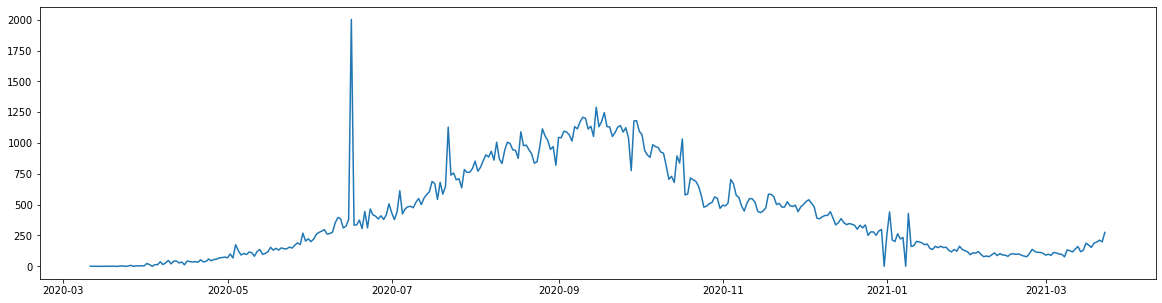

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_new['ds'],df_new['y'])
plt.show()

In [ ]:
import fbprophet
op=fbprophet.Prophet()
op.fit(df_new)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast=op.make_future_dataframe(periods=31,freq='D')
forecast=op.predict(forecast)

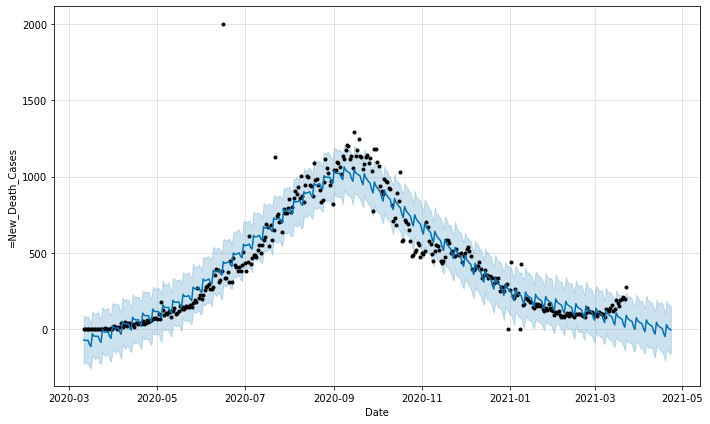

In [ ]:
op.plot(forecast,xlabel='Date',ylabel='=New_Death_Cases');